### Student Information
Name: 孫槐駿

Student ID:110062466

GitHub ID:kstsunhj

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
list_data = []
list_sentence = []
list_score = []
list_txtname = []
categories = []
dir = 'sentiment labelled sentences'
for file in os.listdir(dir):
    with open(dir + '/' + file,"r") as f:
        
        list_data = f.readlines()
        for r in list_data:
            categories.append(file[:-4])
            r = re.match(r'(.*)\t(.*)\n',r)
            list_sentence.append(r.group(1))
            list_score.append(r.group(2))
            list_txtname.append(file[:-4])




In [3]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows_list(list_sentence))

In [4]:
len(X)

3000

In [5]:
X[0:2]

,centence
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."


In [6]:
for t in X['centence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [7]:
X['score'] = list_score

In [8]:
X['title_name'] = list_txtname

In [9]:
X[0:5]

,centence,score,title_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled


In [10]:
X[0:10][["centence","score"]]

,centence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [11]:
X.iloc[::10,0:2][0:10]

,centence,score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [12]:
X.loc[::10,'centence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: centence, dtype: object

In [13]:
X[::10][0:10]

,centence,score,title_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
10,And the sound quality is great.,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,amazon_cells_labelled
50,Not loud enough and doesn't turn on like it sh...,0,amazon_cells_labelled
60,Essentially you can forget Microsoft's tech su...,0,amazon_cells_labelled
70,Mic Doesn't work.,0,amazon_cells_labelled
80,I wear it everyday and it holds up very well.,1,amazon_cells_labelled
90,For a product that costs as much as this one d...,0,amazon_cells_labelled


In [14]:
X.loc[:5, lambda X: ['centence','score']]


,centence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0


In [15]:
X.loc[lambda f: f.score == '1'].iloc[::10][0:5]

,centence,score,title_name
1,"Good case, Excellent value.",1,amazon_cells_labelled
21,I bought this to use with my Kindle Fire and a...,1,amazon_cells_labelled
44,Excellent bluetooth headset.,1,amazon_cells_labelled
61,I really recommend this faceplates since it lo...,1,amazon_cells_labelled
78,"I love this phone , It is very handy and has a...",1,amazon_cells_labelled


In [16]:
X.isnull()

,centence,score,title_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [17]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [18]:
dummy_series = pd.Series(["dummy_record", 1], index=["centence", "score"])
result_with_series = X.append(dummy_series, ignore_index=True)
len(result_with_series)

3001

In [19]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,centence,score,title_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [20]:
dummy_dict = [{'centence': 'dummy_record',
               'score': 1
              }]
X = X.append(dummy_dict, ignore_index=True)
len(X)

3001

In [21]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,centence,score,title_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [22]:
X.dropna(inplace=True)

In [23]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,centence,score,title_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [24]:
len(X)

3000

In [25]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [26]:
sum(X.duplicated())

17

In [27]:
sum(X.duplicated('centence'))

17

In [28]:
dummy_duplicate_dict = [{
                             'centence': 'dummy record',
                             'score': 1, 
                             'title_name': "dummy category"
                        },
                        {
                             'centence': 'dummy record',
                             'score': 1, 
                             'title_name': "dummy category"
                        }]

In [29]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [30]:
sum(X.duplicated('centence'))

18

In [31]:
X.drop_duplicates(keep=False, inplace=True)

In [32]:
len(X)

2966

In [33]:
X_sample = X.sample(n=1000)

In [34]:
len(X_sample)

1000

In [35]:
X_sample[0:4]

,centence,score,title_name
807,The reception through this headset is excellent.,1,amazon_cells_labelled
2730,"The food was barely lukewarm, so it must have ...",0,yelp_labelled
985,There was so much hype over this phone that I ...,0,amazon_cells_labelled
83,The battery runs down quickly.,0,amazon_cells_labelled


In [36]:
X[1687:1688]

,centence,score,title_name
1712,Stanwyck and Morgan are perfectly cast in what...,1,imdb_labelled


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
categories

['amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cel

imdb_labelled            994
yelp_labelled            992
amazon_cells_labelled    980
Name: title_name, dtype: int64


<AxesSubplot:title={'center':'title_name distribution'}>

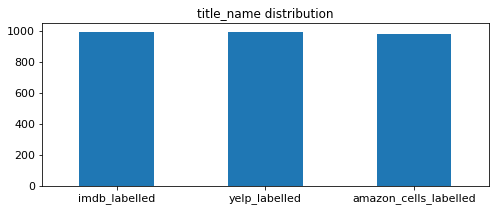

In [39]:
print(X.title_name.value_counts())
X.title_name.value_counts().plot(kind = 'bar',
                                title = 'title_name distribution',
                                ylim = [0, 1050],        
                                rot = 0, fontsize = 11, figsize = (8,3))

imdb_labelled            358
amazon_cells_labelled    324
yelp_labelled            318
Name: title_name, dtype: int64


<AxesSubplot:title={'center':'title_name distribution'}>

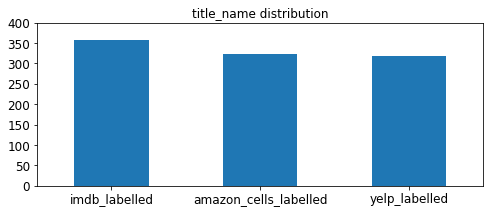

In [40]:
print(X_sample.title_name.value_counts())

# plot barchart for X_sample
X_sample.title_name.value_counts().plot(kind = 'bar',
                                           title = 'title_name distribution',
                                           ylim = [0, 400], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

imdb_labelled            358
amazon_cells_labelled    324
yelp_labelled            318
Name: title_name, dtype: int64


<AxesSubplot:title={'center':'title_name distribution'}>

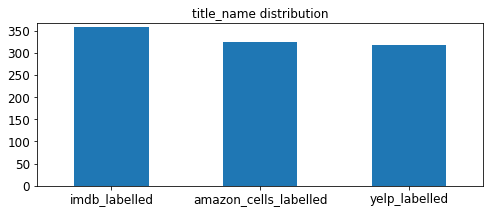

In [41]:
upper_bound = max(X_sample.title_name.value_counts())+10
print(X_sample.title_name.value_counts())
X_sample.title_name.value_counts().plot(kind = 'bar',
                                            title = 'title_name distribution',
                                            ylim = [0, upper_bound],
                                            rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot:title={'center':'title_name distribution'}>

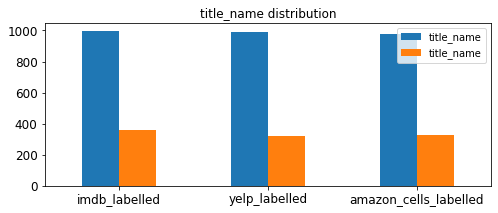

In [42]:
S2 = X_sample.title_name.value_counts()
S1 = X.title_name.value_counts()
S = pd.concat([S1,S2],axis=1)
S.plot(kind = 'bar', label = 'title_name', title = 'title_name distribution', ylim = [0, 1050], rot = 0, fontsize = 12, figsize = (8,3))


In [43]:
import nltk

In [44]:
X['unigrams'] = X['centence'].apply(lambda x: dmh.tokenize_text(x))

In [45]:
X[0:4]['centence']

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
Name: centence, dtype: object

In [46]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [47]:
X[0:4]

,centence,score,title_name,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."


In [48]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.centence)

In [50]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [51]:
analyze(" ".join(list(X[0:1].centence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [52]:
X_counts.shape

(2966, 5156)

In [53]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [54]:
X_counts[0:5, 0:100].toarray()  

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [55]:
T = X_counts[4:5,0:100].toarray()
for r in range(100):
    if T[0][r]:
        print(count_vect.get_feature_names()[r])


In [56]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [59]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [60]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [61]:
plot_z = X_counts[0:20, 0:20].toarray()

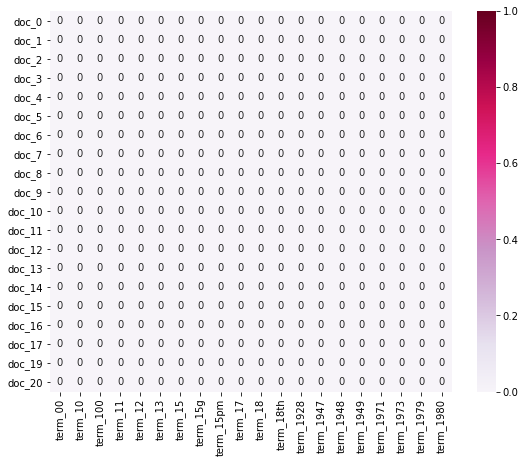

In [62]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

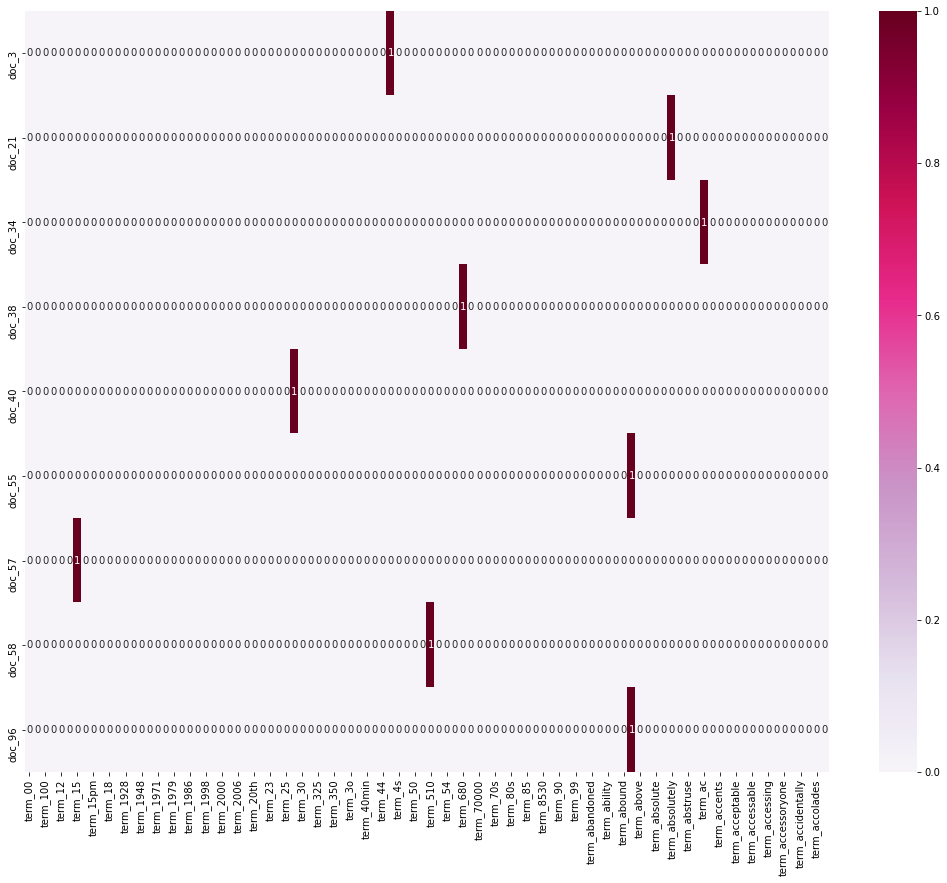

In [63]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray()
todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(todraw.loc[~(todraw == 0).all(axis=1),:],
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [64]:
from sklearn.decomposition import PCA

In [65]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [66]:
categories

['amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cells_labelled',
 'amazon_cel

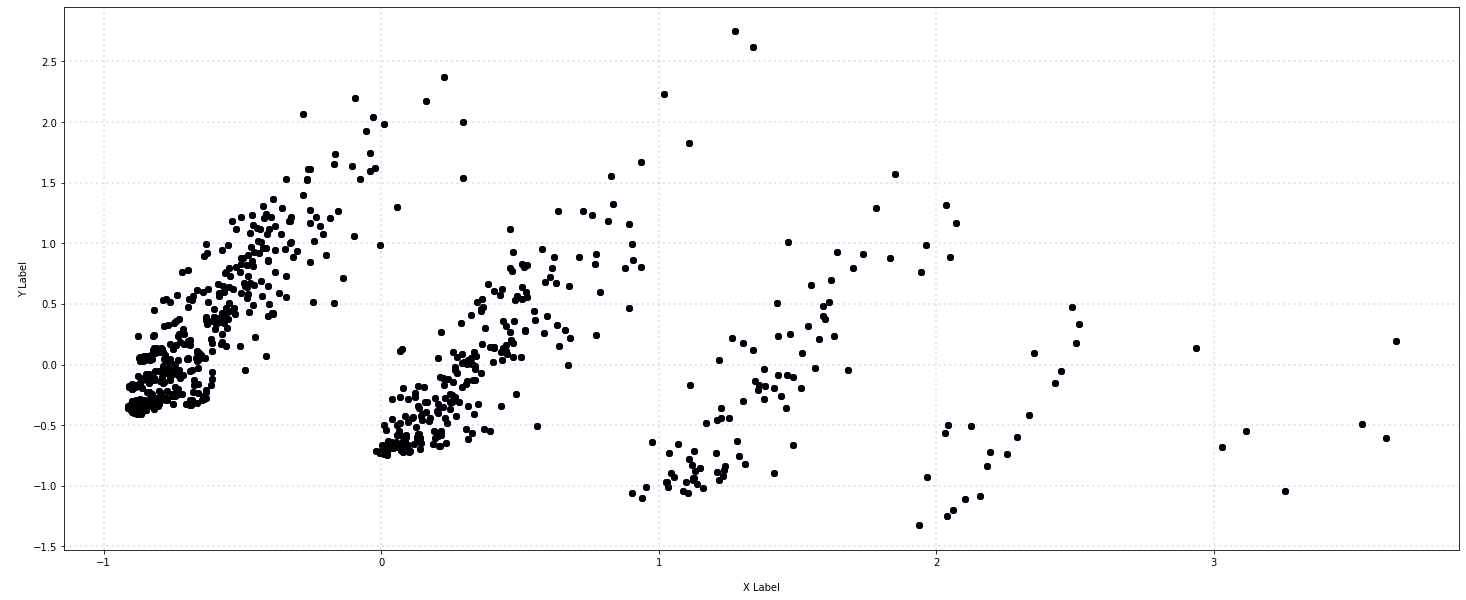

In [67]:
col = ['red', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['title_name'] == category].T[0]
    ys = X_reduced[X['title_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

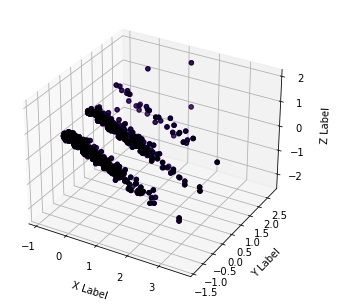

In [68]:
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['title_name'] == category].T[0]
    ys = X_reduced[X['title_name'] == category].T[1]
    zs = X_reduced[X['title_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev = 30, azim = -60)
plt.show()


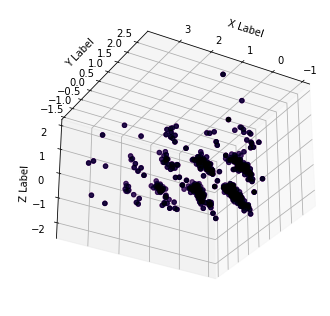

In [69]:

fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['title_name'] == category].T[0]
    ys = X_reduced[X['title_name'] == category].T[1]
    zs = X_reduced[X['title_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev = -30, azim = 60)
plt.show()

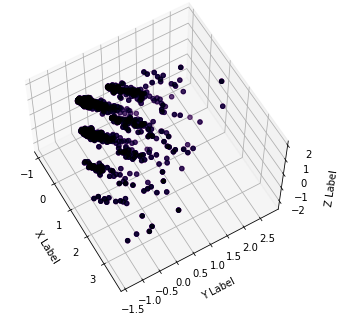

In [70]:
fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['title_name'] == category].T[0]
    ys = X_reduced[X['title_name'] == category].T[1]
    zs = X_reduced[X['title_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(elev = 60, azim = -30)
plt.show()

In [71]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [72]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [73]:
term_frequencies[0]

1

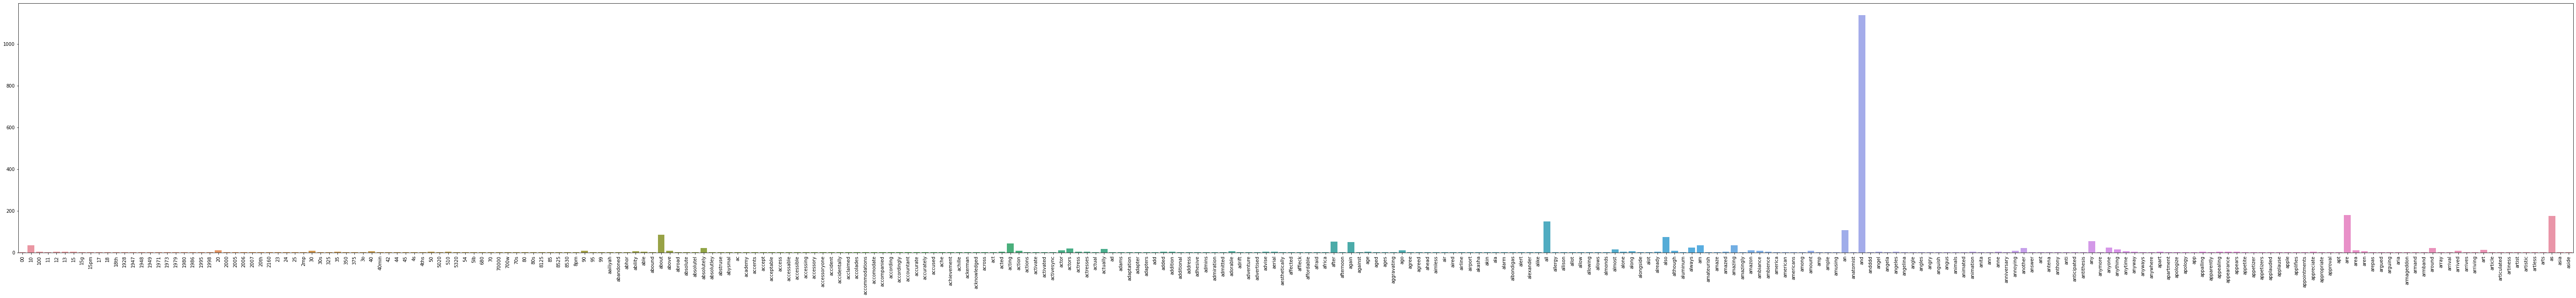

In [74]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

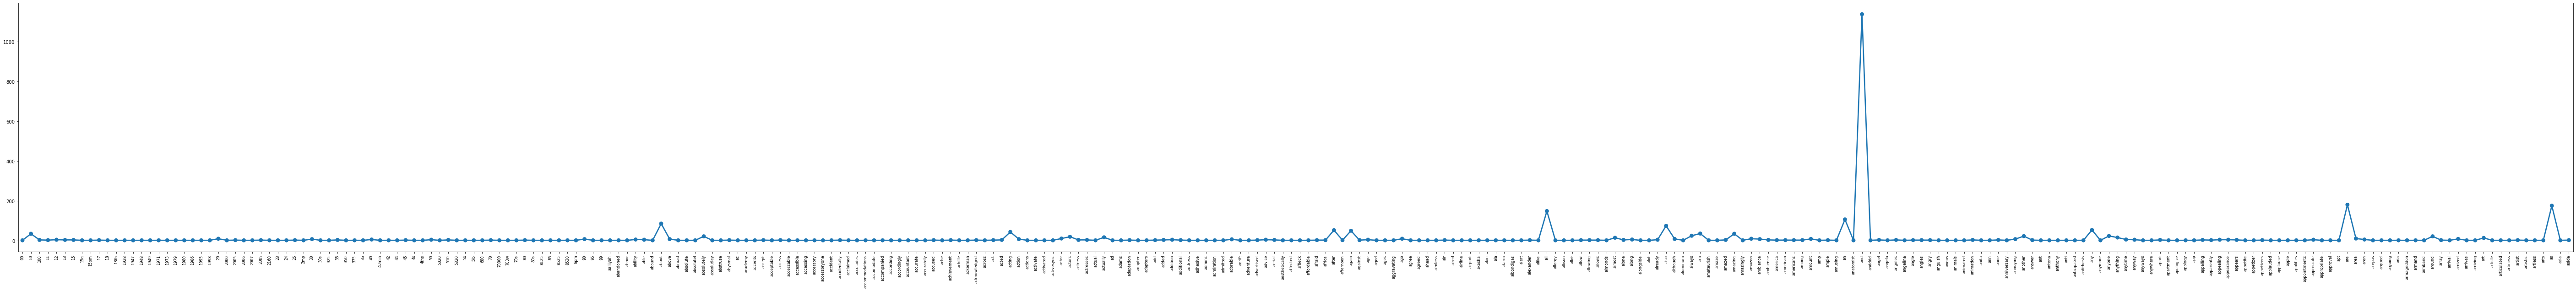

In [75]:
plt.subplots(figsize=(100, 10))
g = sns.pointplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90, fontsize = 'small');

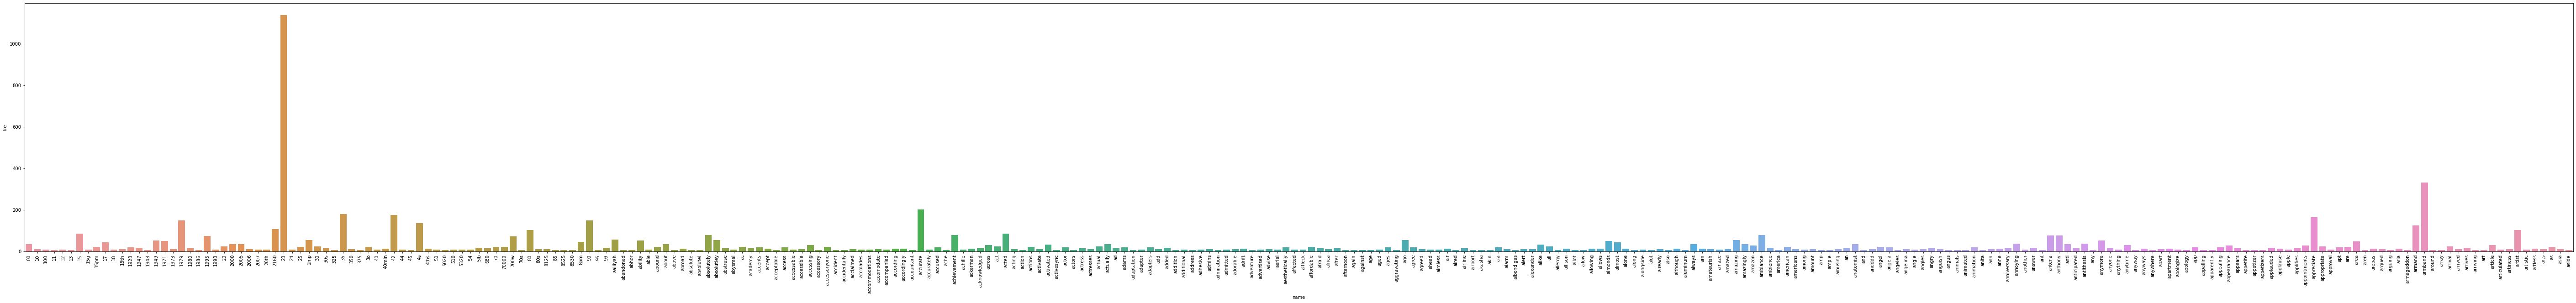

In [76]:
dict = {"fre": term_frequencies, "name" : count_vect.get_feature_names()}
draw_chart = pd.DataFrame(dict)
draw_chart_temp = draw_chart.drop(draw_chart[draw_chart['fre']<5].index)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x = draw_chart_temp.name[:300],y=draw_chart_temp.fre[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);


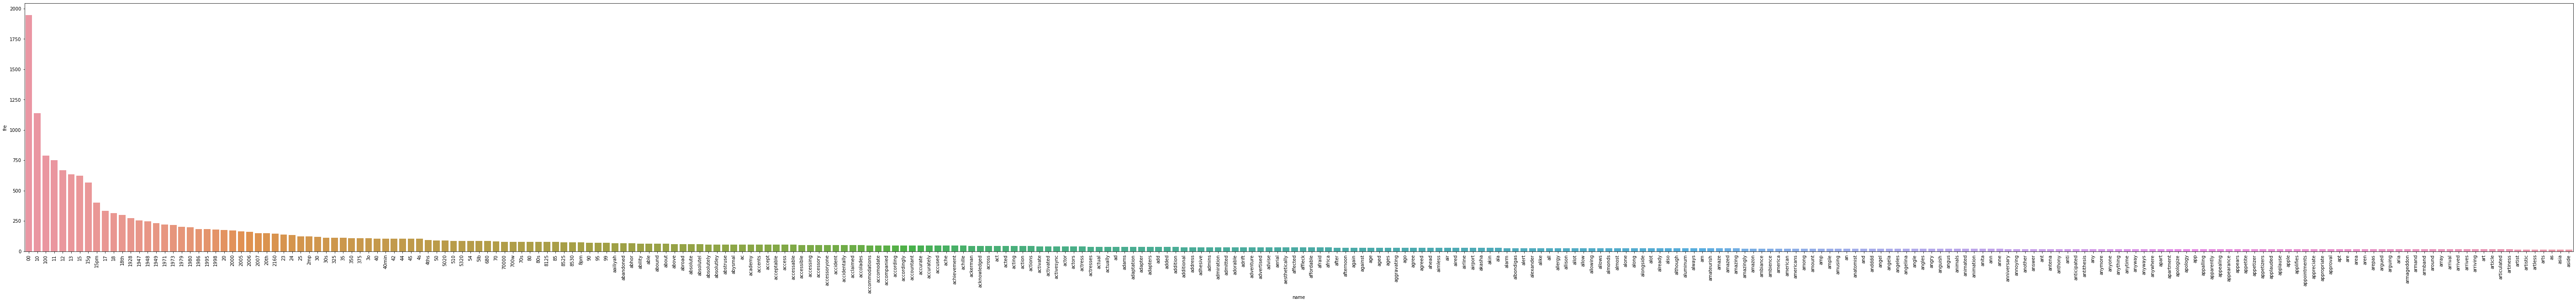

In [77]:
plt.subplots(figsize=(100, 10))
draw_chart_temp = draw_chart.sort_values(by=['fre'],ascending= False)
draw_chart_temp
g = sns.barplot(x=draw_chart_temp.name[:300], y=draw_chart_temp.fre[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [78]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

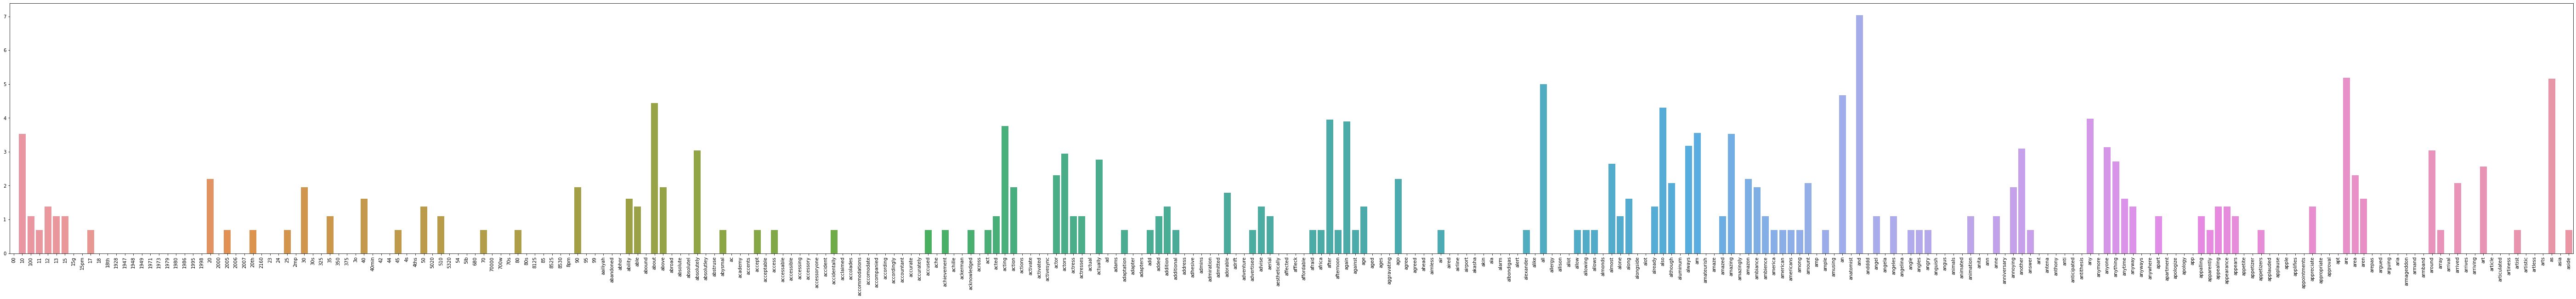

In [79]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [80]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [81]:
mlb = preprocessing.LabelBinarizer()

In [82]:
mlb.fit(X.title_name)

LabelBinarizer()

In [83]:
X

,centence,score,title_name,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,yelp_labelled,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,yelp_labelled,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled,"[The, whole, experience, was, underwhelming, ,..."


In [84]:
mlb.classes_

array(['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled'],
      dtype='<U21')

In [85]:
X['bin_category'] = mlb.transform(X['title_name']).tolist()

In [86]:
X[0:9]

,centence,score,title_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


In [87]:
#We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['centence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['centence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['centence']
document_to_transform_3.append(random_record_3)

In [88]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [89]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [90]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


Generate meaningful **new data visualizations**

use this graphic to show the scores' index

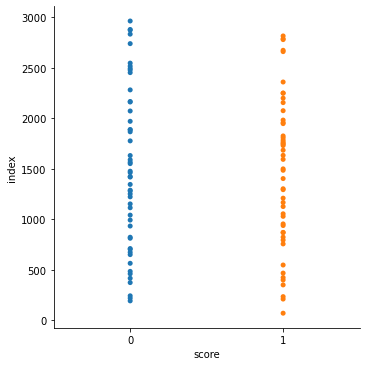

In [91]:
S = X
S['index']=S.index#add index to S coloumns

S_sample = S.sample(n=1000)
sns.catplot(x="score", y="index",jitter=False, data=S_sample[0:100])#draw the graphic

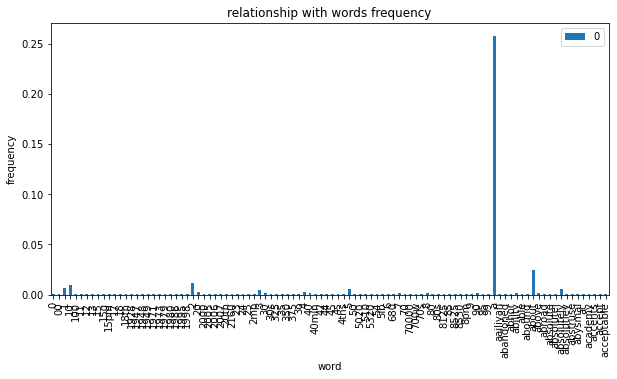

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = CountVectorizer()
X_text = ""
for r in X["unigrams"]:
    for j in r:
        X_text += j + " "#split words
vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
S = vectorizer.fit_transform([X_text])
transformer = TfidfTransformer(smooth_idf=True)
Z = transformer.fit_transform(S)
TFIDF = pd.DataFrame(Z.toarray(),columns=vectorizer.get_feature_names())
chart = TFIDF.iloc[0][:100].plot(kind='bar',  #chart type
		            title='relationship with words frequency',  #chart title
                    xlabel='word',  
                    ylabel='frequency',  
                    legend=True,  
                    figsize=(10, 5))  # chart size
plt.show()

Generate TF-IDF features

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
list_sentence = [[],[],[]]
txt_name = []
cnt = 0
dir = 'sentiment labelled sentences'
#input file data
for file in os.listdir(dir):
    with open(dir + '/' + file,"r") as f:
        txt_name.append(file[:-4])
        list_data = f.readlines()
        list_sentence[cnt] = ""
        for r in list_data:
            r = re.match(r'(.*)\t(.*)\n',r)
            # list_sentence[cnt].append(r.group(1))
            
            list_sentence[cnt] += r.group(1) + " "
            
        cnt += 1   


vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  #convert a collection of text documents to a matrix of token counts
S = vectorizer.fit_transform([list_sentence[0],list_sentence[1],list_sentence[2]])#normalization
transformer = TfidfTransformer(smooth_idf=True)#Transform a count matrix to a normalized tf or tf-idf representation.
Z = transformer.fit_transform(S)
r = pd.DataFrame(Z.toarray(),columns=vectorizer.get_feature_names(), index=txt_name)#make dataframe
print("TFIDF")
r

TFIDF


,0,00,1,10,100,11,12,13,15,15g,...,yum,yummy,yun,z,z500a,zero,zillion,zombie,zombiez,聳
amazon_cells_labelled,0.000000,0.000000,0.008406,0.003736,0.001203,0.001203,0.000934,0.001203,0.000934,0.001581,...,0.000000,0.000000,0.000000,0.000000,0.001581,0.001203,0.000000,0.000000,0.000000,0.000000
imdb_labelled,0.002258,0.000000,0.004667,0.019333,0.000000,0.000000,0.000667,0.001717,0.000667,0.000000,...,0.000000,0.000000,0.001129,0.001129,0.000000,0.000000,0.001129,0.002258,0.001129,0.005644
yelp_labelled,0.000000,0.001542,0.006376,0.004554,0.002346,0.001173,0.001822,0.000000,0.000911,0.000000,...,0.003084,0.006169,0.000000,0.000000,0.000000,0.005864,0.000000,0.000000,0.000000,0.000000


In [94]:
print("IDF")
pd.DataFrame([transformer.idf_], columns=vectorizer.get_feature_names())#use transformer.idf_ to make dataframe

IDF


,0,00,1,10,100,11,12,13,15,15g,...,yum,yummy,yun,z,z500a,zero,zillion,zombie,zombiez,聳
0,1.693147,1.693147,1.0,1.0,1.287682,1.287682,1.0,1.287682,1.0,1.693147,...,1.693147,1.693147,1.693147,1.693147,1.693147,1.287682,1.693147,1.693147,1.693147,1.693147


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_text = ""
for r in X["unigrams"]:
    for j in r:
        X_text += j + " "
vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")  
S = vectorizer.fit_transform([X_text])
transformer = TfidfTransformer(smooth_idf=True)
Z = transformer.fit_transform(S)
TFIDF = pd.DataFrame(Z.toarray(),columns=vectorizer.get_feature_names())
print("TFIDF")
TFIDF

TFIDF


,0,00,1,10,100,11,12,13,15,15g,...,yum,yummy,yun,z,z500a,zero,zillion,zombie,zombiez,聳
0,0.000583,0.000291,0.006699,0.009904,0.000874,0.000583,0.001165,0.000874,0.000874,0.000291,...,0.000583,0.001165,0.000291,0.000291,0.000291,0.001748,0.000291,0.000583,0.000291,0.001456


Naive bayes classifier


In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
list_sentence = []
data = []
label = []
txt_name = []
dir = 'sentiment labelled sentences'
#input the file data
for file in os.listdir(dir):
    with open(dir + '/' + file,"r") as f:
        txt_name.append(file[:-4])
        list_data = f.readlines()
        for r in list_data:
            r = re.match(r'(.*)\t(.*)\n',r)
            # list_sentence[cnt].append(r.group(1))
            
            list_sentence.append(r.group(1))
            label.append(r.group(2))
#split the words
for r in list_sentence:
    
    r = nltk.word_tokenize(r, language='english')
    Str = ''
    for j in r:
        Str += j + ' '
    data.append(Str)
#split the data to train and test
train_data = data[:2500]
train_label = label[:2500]
test_data = data[2500:3000]
test_label = label[2500:3000]

In [97]:
#train in TFIDF way
vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")   
S = vectorizer.fit_transform(train_data)
train_tfidf = TfidfTransformer(use_idf=False).fit_transform(S)
clf = MultinomialNB().fit(train_tfidf.toarray(), train_label)#use MultinomialNB func to train
#test and compare and calculate error rate
S_text = vectorizer.transform(test_data)        
test_tfidf = TfidfTransformer(use_idf=False).fit_transform(S_text)
predict_result = clf.predict(test_tfidf)
print(metrics.classification_report(test_label,predict_result))
print(metrics.confusion_matrix(test_label,predict_result))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       281
           1       0.75      0.86      0.80       219

    accuracy                           0.81       500
   macro avg       0.81      0.82      0.81       500
weighted avg       0.82      0.81      0.81       500

[[218  63]
 [ 31 188]]


In [98]:
#train in word frequency way
vectorizer = CountVectorizer(stop_words=None, token_pattern="(?u)\\b\\w+\\b")   
train_tf = vectorizer.fit_transform(train_data)
clf = MultinomialNB().fit(train_tf.toarray(), train_label)#use MultinomialNB func to train
#test and compare and calculate error rate
test_tf = vectorizer.transform(test_data)        
predict_result = clf.predict(test_tfidf)
print(metrics.classification_report(test_label,predict_result))
print(metrics.confusion_matrix(test_label,predict_result))
# train_data

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       281
           1       0.77      0.84      0.80       219

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500

[[226  55]
 [ 35 184]]


TF means words frequecy, IDF means inverse inverse document frequency, it could take out some words and choose others. In this case, TFIDF could do better maybe because it could pick important words.